<a href="https://colab.research.google.com/github/Gopizone/DataScience/blob/main/Forecasting_Model_based_methods(Delhi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
from google.colab import files
files=files.upload()

Saving Delhi.xlsx to Delhi.xlsx


In [3]:
df = pd.read_excel (r'Delhi.xlsx',header=0, parse_dates=True)

In [4]:
# Import libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 3000)
from scipy import interpolate
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
#df = pd.read_csv('delhi.csv')
df.head()

,date,pm25
0,2018-04-20 00:00:00,92
1,2018-04-19 23:00:00,89
2,2018-04-19 22:00:00,75
3,2018-04-19 21:00:00,57
4,2018-04-19 20:00:00,57


In [5]:

df['date']=pd.to_datetime(df['date'],format='%d-%m-%Y %H:%M')


In [6]:
df['pm25'] = df['pm25'].replace('-',np.nan)
df['pm25']=df['pm25'].astype(str).astype(float)
df['pm25_U']=df['pm25']

In [7]:
start=df.date.min()
stop=df.date.max()
seriesDate=[]

while start < stop:
    start = start + timedelta(hours=1)
    seriesDate.append(start)

df3 = pd.DataFrame(columns = ['date', 'pm25']) 
df3['date']=seriesDate


In [8]:
result = pd.merge(df, df3, on="date", how="outer")


In [9]:
result=result.drop(columns=['pm25_y'])
result=result.rename(columns={"pm25_x": "pm25"})
result.count()

date      2617
pm25      2294
pm25_U    2294
dtype: int64

In [10]:
result=result.sort_values(by='date')
result = result.reset_index(drop=True)
result.head()

,date,pm25,pm25_U
0,2018-01-01 00:00:00,423.0,423.0
1,2018-01-01 01:00:00,414.0,414.0
2,2018-01-01 02:00:00,417.0,417.0
3,2018-01-01 03:00:00,466.0,466.0
4,2018-01-01 04:00:00,470.0,470.0


In [11]:
df=result

In [12]:
df_missing=df[(df['pm25'].isnull()==True)]
df_missing['date']=pd.to_datetime(df_missing['date'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df = df.dropna()
df.count()

date      2294
pm25      2294
pm25_U    2294
dtype: int64

In [14]:
df_missing.count()

date      323
pm25        0
pm25_U      0
dtype: int64

## Handling missing data -  mean before after method - mean of indentical hour in the week  (+3 , -3)

In [15]:
def timewise_mean(arg_date):
    df1=df[(df['date'].dt.hour == arg_date.hour) & (df['date'].dt.day > arg_date.day-3) & (df['date'].dt.day < arg_date.day+3)] 
    return df1.pm25.mean()

for index,row in df_missing.iterrows():
    df_missing.at[index, 'pm25_U'] =timewise_mean(row['date'])
    

In [16]:
df2 = df.append(df_missing)
df2.pm25_U.count()
df2['date']=pd.to_datetime(df2['date'])
df2['pm25']=df2['pm25'].astype(str).astype(float)
df2['pm25_U']=df2['pm25_U'].astype(str).astype(float)

In [17]:
df2=df2.sort_values(by='date')

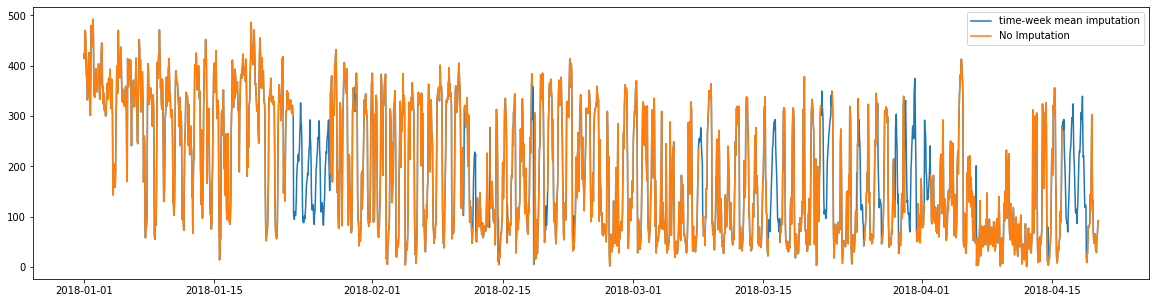

In [18]:
import matplotlib.pyplot as plt
RN=[]
for i in range(0,df2.pm25_U.count()):
    RN.append(i)
plt.figure(figsize=(20,5))

plt.plot(df2['date'], df2['pm25_U'])
plt.plot(df2['date'], df2['pm25'])
labels = []
labels.append('time-week mean imputation')
labels.append('No Imputation')
plt.legend(labels)

In [19]:
df_Jan=df2.loc[(df2['date'].dt.day >= 15) & (df2['date'].dt.day <= 30) & (df2['date'].dt.month == 1)] 


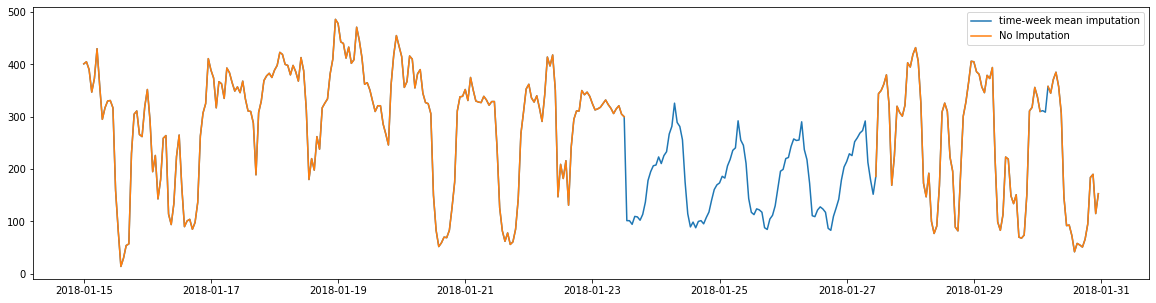

In [20]:

RN=[]
for i in range(0,df_Jan.pm25_U.count()):
    RN.append(i)
plt.figure(figsize=(20,5))

plt.plot(df_Jan['date'], df_Jan['pm25_U'])
plt.plot(df_Jan['date'], df_Jan['pm25'])
labels = []
labels.append('time-week mean imputation')
labels.append('No Imputation')
plt.legend(labels)

In [51]:
df=df2

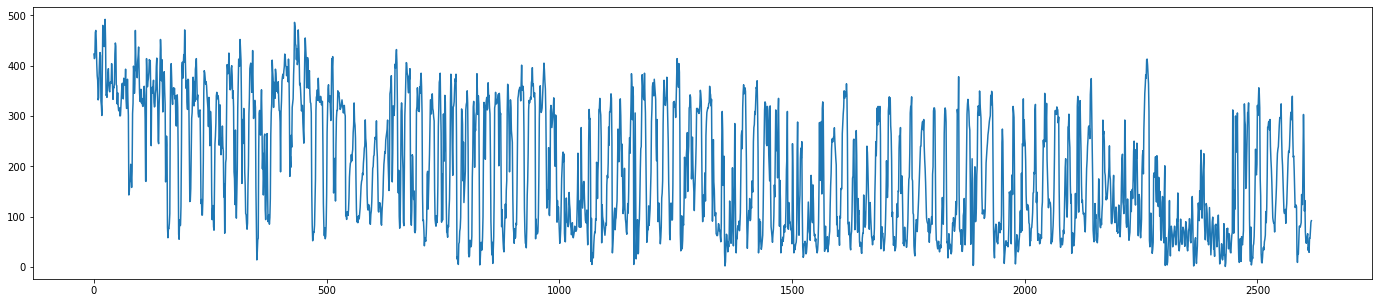

In [52]:
plt.figure(figsize=(24,5))
df.pm25_U.plot()

In [53]:
df["Date"] = pd.to_datetime(df.date,format="%b-%y-%d-%H:%M:%S")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%y") # year extraction
df["day"] = df.Date.dt.strftime("%d") # Day extraction
df["time"] = df.Date.dt.strftime("%H:%M:%S")

In [54]:
df.head()

,date,pm25,pm25_U,Date,month,year,day,time,Time
0,2018-01-01 00:00:00,423.0,423.0,2018-01-01 00:00:00,Jan,18,01,00:00:00,0
1,2018-01-01 01:00:00,414.0,414.0,2018-01-01 01:00:00,Jan,18,01,01:00:00,0
2,2018-01-01 02:00:00,417.0,417.0,2018-01-01 02:00:00,Jan,18,01,02:00:00,0
3,2018-01-01 03:00:00,466.0,466.0,2018-01-01 03:00:00,Jan,18,01,03:00:00,0
4,2018-01-01 04:00:00,470.0,470.0,2018-01-01 04:00:00,Jan,18,01,04:00:00,0


In [55]:
df.tail()

,date,pm25,pm25_U,Date,month,year,day,time,Time
2612,2018-04-19 20:00:00,57.0,57.0,2018-04-19 20:00:00,Apr,18,19,20:00:00,0
2613,2018-04-19 21:00:00,57.0,57.0,2018-04-19 21:00:00,Apr,18,19,21:00:00,0
2614,2018-04-19 22:00:00,75.0,75.0,2018-04-19 22:00:00,Apr,18,19,22:00:00,0
2615,2018-04-19 23:00:00,89.0,89.0,2018-04-19 23:00:00,Apr,18,19,23:00:00,0
2616,2018-04-20 00:00:00,92.0,92.0,2018-04-20 00:00:00,Apr,18,20,00:00:00,0


In [56]:
import seaborn as sns

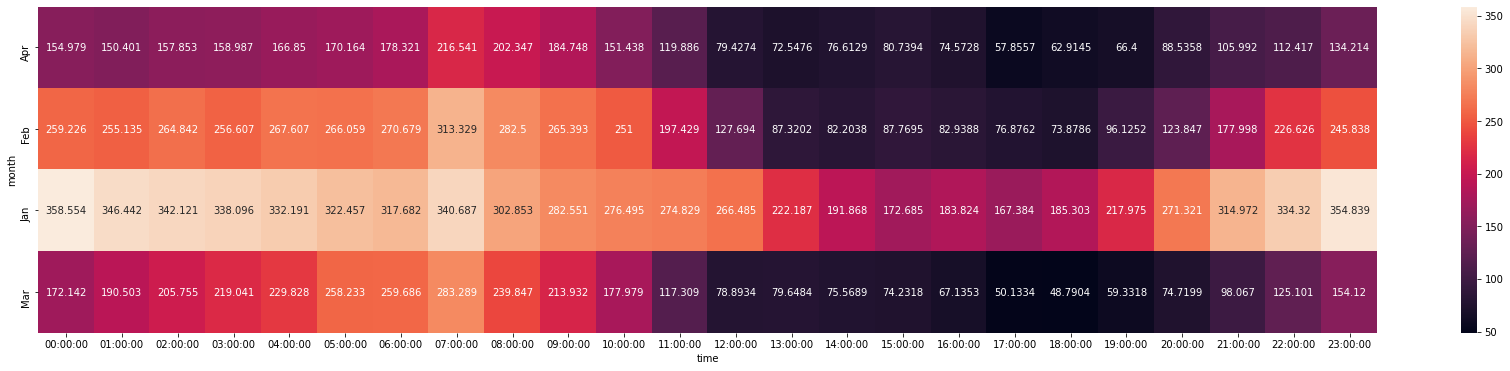

In [57]:
plt.figure(figsize=(30,6))
heatmap_y_time = pd.pivot_table(data=df,values="pm25_U",index="month",columns="time",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_time,annot=True,fmt="g") #fmt is format of the grid values

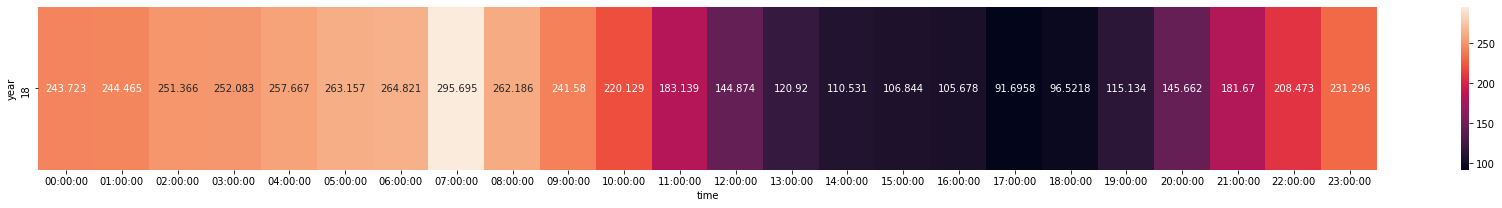

In [58]:
plt.figure(figsize=(30,3))
heatmap_y_time = pd.pivot_table(data=df,values="pm25_U",index="year",columns="time",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_time,annot=True,fmt="g") #fmt is format of the grid values

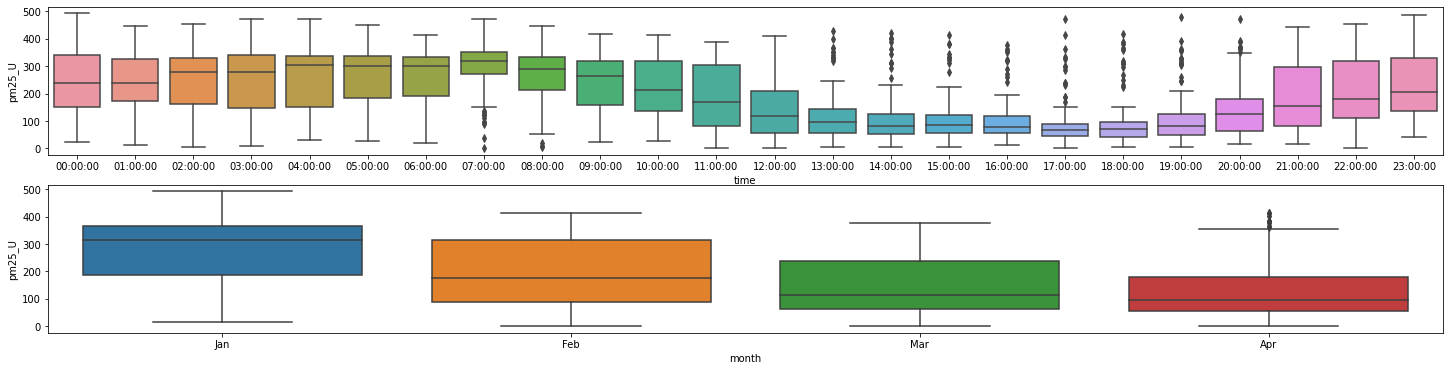

In [59]:
# Boxplot for ever
plt.figure(figsize=(25,6))
plt.subplot(211)
sns.boxplot(x="time",y="pm25_U",data=df)
plt.subplot(212)
sns.boxplot(x="month",y="pm25_U",data=df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


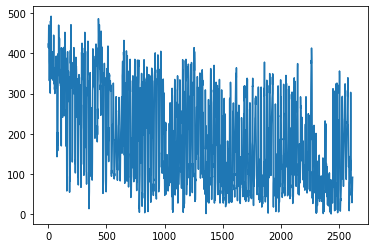

In [64]:
time =['00','01','h02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23'] 
#import numpy as np
p = df["time"][0]
p[0:3]
df['Time']= 0

for i in range(2617):
    p = df["time"][i]
    df['time'][i]= p[0:3]
    
time_dummies = pd.DataFrame(pd.get_dummies(df['time']))
df1 = pd.concat([df.pm25_U,time_dummies],axis = 1)

df1["t"] = np.arange(1,2618)

df1["t_square"] = df1["t"]*df1["t"]
df1.columns
df1["log_pm25_U"] = np.log(df1["pm25_U"])
df1.rename(columns={"pm25_U": 'pm25_U'}, inplace=True)
df1.pm25_U.plot()

In [65]:
df1.head()

,pm25_U,00:,01:,02:,03:,04:,05:,06:,07:,08:,09:,10:,11:,12:,13:,14:,15:,16:,17:,18:,19:,20:,21:,22:,23:,t,t_square,log_pm25_U
0,423.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6.047372
1,414.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,6.025866
2,417.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,9,6.033086
3,466.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,16,6.144186
4,470.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,25,6.152733


In [66]:
df1.rename(columns={'00:': 'h0',
                   '01:': 'h1',
                    '02:': 'h2',
                   '03:': 'h3',
                    '04:': 'h4',
                   '05:': 'h5',
                    '06:': 'h6',
                   '07:': 'h7',
                    '08:': 'h8',
                   '09:': 'h9',
                    '10:': 'h10',
                   '11:': 'h11',
                    '12:': 'h12',
                   '13:': 'h13',
                    '14:': 'h14',
                   '15:': 'h15',
                    '16:': 'h16',
                   '17:': 'h17',
                    '18:': 'h18',
                   '19:': 'h19',
                    '20:': 'h20',
                   '21:': 'h21',
                    '22:': 'h22',
                   '23:': 'h23'},
          inplace=True, errors='raise')

In [67]:
df1.head()

,pm25_U,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,t,t_square,log_pm25_U
0,423.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6.047372
1,414.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,6.025866
2,417.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,9,6.033086
3,466.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,16,6.144186
4,470.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,25,6.152733


In [48]:
#df1.to_csv (r'delhi1.csv', index = False, header=True)

#from google.colab import files 
#files.download('delhi1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

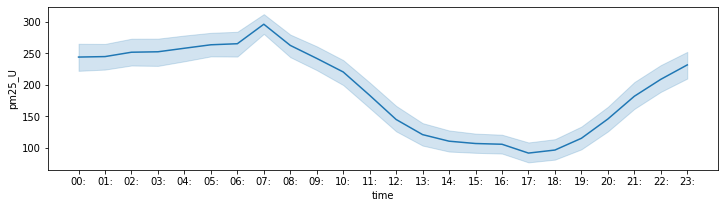

In [68]:
plt.figure(figsize=(12,3))
sns.lineplot(x="time",y="pm25_U",data=df)

In [71]:
Train = df1.head(2593)
Test = df1.tail(24)

In [72]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('pm25_U~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['pm25_U'])-np.array(pred_linear))**2))
rmse_linear

66.90871143695772

In [103]:
#Exponential

Exp = smf.ols('log_pm25_U~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['pm25_U'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

69.99049443103465

In [74]:

#Quadratic 

Quad = smf.ols('pm25_U~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['pm25_U'])-np.array(pred_Quad))**2))
rmse_Quad

78.28465233698162

In [75]:
#Additive seasonality 

add_sea = smf.ols('pm25_U~h0+h1+h2+h3+h4+h5+h6+h7+h8+h9+h10+h11+h12+h13+h14+h15+h16+h17+h18+h19+h20+h21+h22+h23',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['h0','h1','h2','h3','h4','h5','h6','h7','h8','h9','h10','h11','h12','h13','h14','h15','h16','h17','h18','h19','h20','h21','h22','h23']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['pm25_U'])-np.array(pred_add_sea))**2))
rmse_add_sea

105.32521870504863

In [77]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('pm25_U~h0+h1+h2+h3+h4+h5+h6+h7+h8+h9+h10+h11+h12+h13+h14+h15+h16+h17+h18+h19+h20+h21+h22+h23',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['h0','h1','h2','h3','h4','h5','h6','h7','h8','h9','h10','h11','h12','h13','h14','h15','h16','h17','h18','h19','h20','h21','h22','h23','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['pm25_U'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

105.32521870504863

In [105]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_pm25_U~h0+h1+h2+h3+h4+h5+h6+h7+h8+h9+h10+h11+h12+h13+h14+h15+h16+h17+h18+h19+h20+h21+h22+h23',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['pm25_U'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

75.87501588480734

In [106]:

#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_pm25_U~t+h0+h1+h2+h3+h4+h5+h6+h7+h8+h9+h10+h11+h12+h13+h14+h15+h16+h17+h18+h19+h20+h21+h22+h23',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['pm25_U'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

47.451842115505855

In [107]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,47.451842
0,rmse_linear,66.908711
1,rmse_Exp,69.990494
5,rmse_Mult_sea,75.875016
2,rmse_Quad,78.284652
3,rmse_add_sea,105.325219
4,rmse_add_sea_quad,105.325219


Predict for new time period

In [90]:
from google.colab import files
files=files.upload()

Saving delhi validation.csv to delhi validation.csv


In [120]:
predict_data = pd.read_csv("delhi validation.csv")

In [129]:
predict_data.head(24)

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,t,t_square,forecasted_pm
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2618,6853924,141.516124
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2619,6859161,148.417504
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2620,6864400,149.133692
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2621,6869641,154.718298
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2622,6874884,160.208382
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2623,6880129,161.872406
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2624,6885376,192.745960
7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2625,6890625,159.237028
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2626,6895876,138.630674
9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2627,6901129,117.179589


In [125]:
model_full = smf.ols('pm25_U~t+h0+h1+h2+h3+h4+h5+h6+h7+h8+h9+h10+h11+h12+h13+h14+h15+h16+h17+h18+h19+h20+h21+h22+h23',data=df1).fit()

In [126]:
pred_new  = pd.Series(model_full.predict(predict_data))
pred_new

0     141.516124
1     148.417504
2     149.133692
3     154.718298
4     160.208382
5     161.872406
6     192.745960
7     159.237028
8     138.630674
9     117.179589
10     80.189724
11     41.925335
12     17.970941
13      7.582098
14      3.895292
15      2.729180
16    -11.253158
17     -6.427150
18     12.185019
19     42.713173
20     78.720871
21    105.523605
22    128.347123
23    139.837735
dtype: float64

In [127]:
predict_data["forecasted_pm"] = pd.Series(pred_new)

In [128]:
predict_data

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,t,t_square,forecasted_pm
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2618,6853924,141.516124
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2619,6859161,148.417504
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2620,6864400,149.133692
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2621,6869641,154.718298
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2622,6874884,160.208382
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2623,6880129,161.872406
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2624,6885376,192.745960
7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2625,6890625,159.237028
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2626,6895876,138.630674
9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2627,6901129,117.179589
